<a href="https://colab.research.google.com/github/Soujanya-mallikarjun/repo/blob/main/ChurnPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [153]:
churn_data = pd.read_csv('/content/telecom_churn_data.csv')

In [154]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
churn_data.shape

(7043, 21)

In [156]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [157]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [158]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


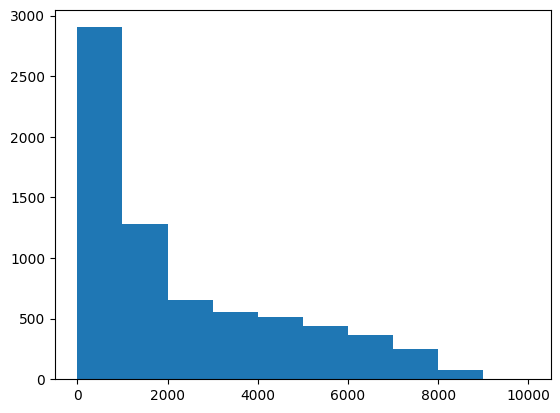

In [159]:
plt.hist(churn_data['TotalCharges'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.show()

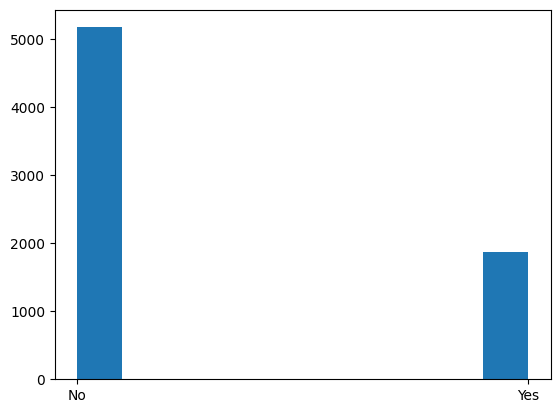

In [160]:
plt.hist(churn_data['Churn'])
plt.show()

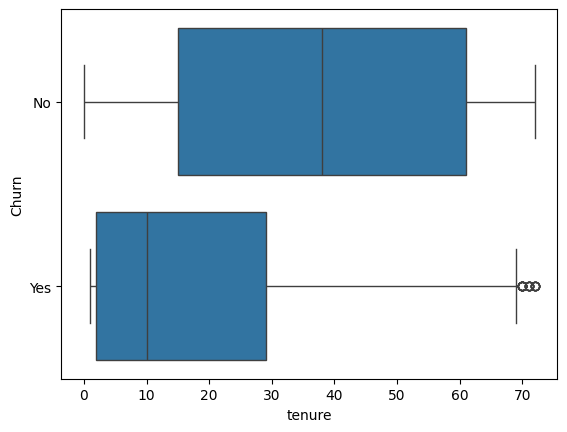

In [161]:
sns.boxplot(x= churn_data['tenure'], y= churn_data['Churn'])
plt.show()

In [162]:
churn_data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

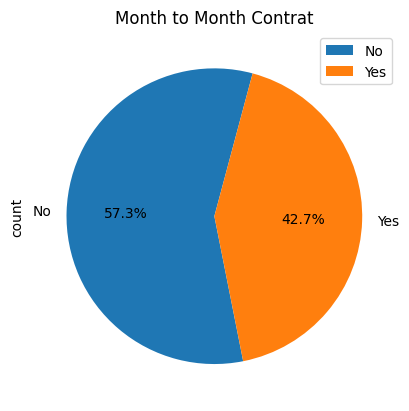

In [163]:
piechart_m2m =  pd.DataFrame(churn_data[churn_data['Contract'] == 'Month-to-month']['Churn'].value_counts())
piechart_m2m.plot.pie(subplots=True, labels=piechart_m2m.index.values, autopct='%1.1f%%', startangle=75)
plt.title("Month to Month Contrat")
plt.gca().set_aspect("equal")
plt.show()

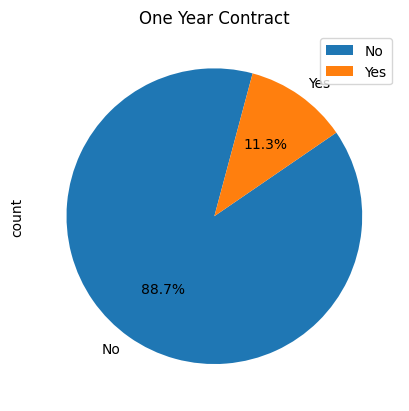

In [164]:
piechart_1year = pd.DataFrame(churn_data[churn_data['Contract'] == 'One year']['Churn'].value_counts())
piechart_1year.plot.pie(subplots=True, labels = piechart_1year.index.values, autopct='%1.1f%%', startangle=75)
plt.title("One Year Contract")
plt.gca().set_aspect("equal")
plt.show()

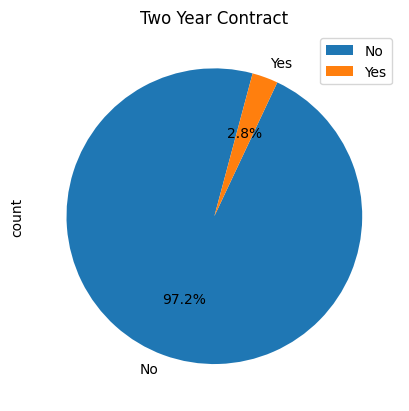

In [165]:
piechart_2year = pd.DataFrame(churn_data[churn_data['Contract'] == 'Two year']['Churn'].value_counts())
piechart_2year.plot.pie(subplots=True, labels = piechart_2year.index.values, autopct='%1.1f%%', startangle=75)
plt.title("Two Year Contract")
plt.gca().set_aspect("equal")

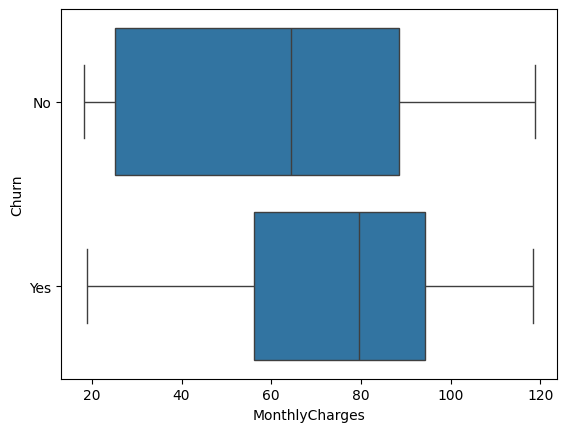

In [166]:
sns.boxplot(x = churn_data['MonthlyCharges'], y = churn_data['Churn'])
plt.show()

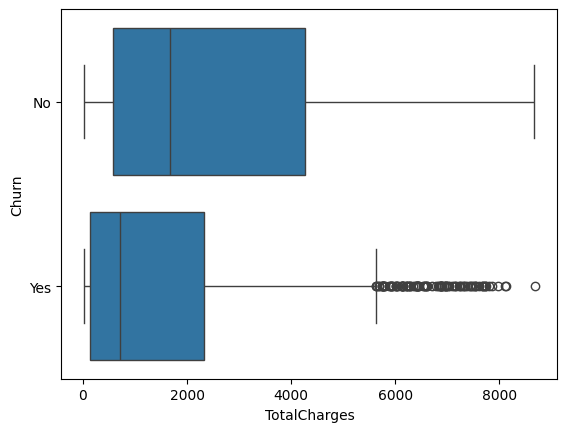

In [167]:
sns.boxplot(x = churn_data['TotalCharges'], y = churn_data['Churn'])
plt.show()

In [168]:
churn_data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

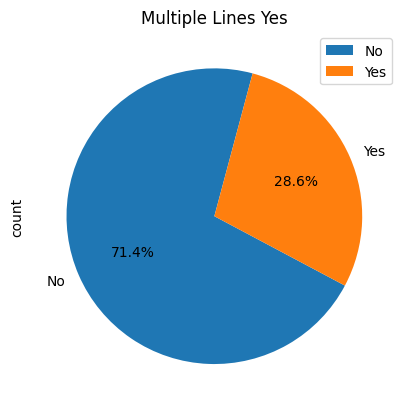

In [169]:
multipleLines_yes = pd.DataFrame(churn_data[churn_data['MultipleLines'] == 'Yes']['Churn'].value_counts())
multipleLines_yes.plot.pie(subplots=True, labels = multipleLines_yes.index.values, autopct='%1.1f%%', startangle=75)
plt.title("Multiple Lines Yes")
plt.gca().set_aspect("equal")

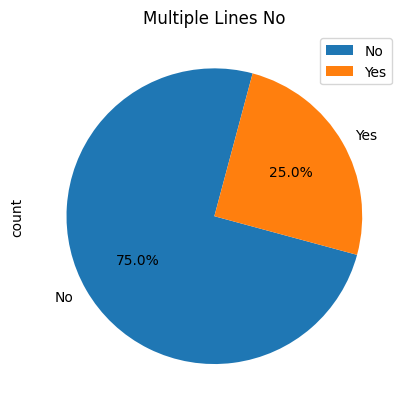

In [170]:
multipleLines_yes = pd.DataFrame(churn_data[churn_data['MultipleLines'] == 'No']['Churn'].value_counts())
multipleLines_yes.plot.pie(subplots=True, labels = multipleLines_yes.index.values, autopct='%1.1f%%', startangle=75)
plt.title("Multiple Lines No")
plt.gca().set_aspect("equal")

In [171]:
churn_data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

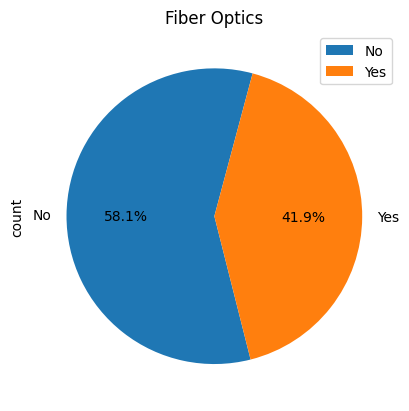

In [172]:
fiber_optics = pd.DataFrame(churn_data[churn_data['InternetService'] == 'Fiber optic']['Churn'].value_counts())
fiber_optics.plot.pie(subplots=True, labels = fiber_optics.index.values, autopct='%1.1f%%', startangle=75)
plt.title("Fiber Optics")
plt.gca().set_aspect("equal")

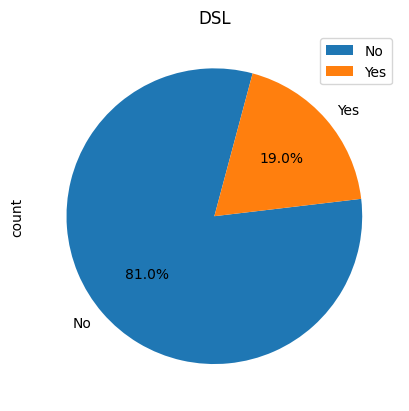

In [173]:
dsl = pd.DataFrame(churn_data[churn_data['InternetService'] == 'DSL']['Churn'].value_counts())
dsl.plot.pie(subplots=True, labels = dsl.index.values, autopct='%1.1f%%', startangle=75)
plt.title("DSL")
plt.gca().set_aspect("equal")

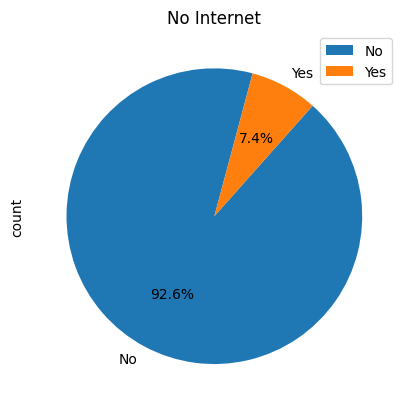

In [174]:
nointernet = pd.DataFrame(churn_data[churn_data['InternetService'] == 'No']['Churn'].value_counts())
nointernet.plot.pie(subplots=True, labels = nointernet.index.values, autopct='%1.1f%%', startangle=75)
plt.title("No Internet")
plt.gca().set_aspect("equal")

In [175]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [176]:
data_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binary_map(x):
  return x.map({'Yes':1, 'No':0})

churn_data[data_list] = churn_data[data_list].apply(binary_map)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [177]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [186]:
churn_data['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [190]:
churn_data.replace({'MultipleLines': {'No': 0, 'Yes':1, 'No phone service': 2},
                    'gender': {'Female':0, 'Male':1},
                    'InternetService': {'Fiber optic':0, 'DSL':1, 'No':2},
                    'OnlineSecurity': {'No':0, 'Yes':1, 'No internet service':2},
                    'OnlineBackup': {'No':0, 'Yes':1, 'No internet service':2},
                    'DeviceProtection': {'No':0, 'Yes':1, 'No internet service':2},
                    'TechSupport': {'No':0, 'Yes':1, 'No internet service':2},
                    'StreamingTV': {'No':0, 'Yes':1, 'No internet service':2},
                    'StreamingMovies': {'No':0, 'Yes':1, 'No internet service':2},
                    'Contract': {'Month-to-month':0, 'One year':1, 'Two year':2},
                    'PaymentMethod': {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}
                    }, inplace=True)

In [191]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [192]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [194]:
X = churn_data.drop(['customerID','Churn'], axis =1)
y = churn_data['Churn']

In [195]:
print(X)
print(y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                1     

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [197]:
print(X.shape, X_train.shape, X_test.shape)

(7043, 19) (4930, 19) (2113, 19)


In [200]:
model = LogisticRegression(max_iter=200)

In [201]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [202]:
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print('training data accuracy', training_data_accuracy)

training data accuracy 0.8054766734279919


In [203]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('test data accuracy', test_data_accuracy)

test data accuracy 0.804070042593469


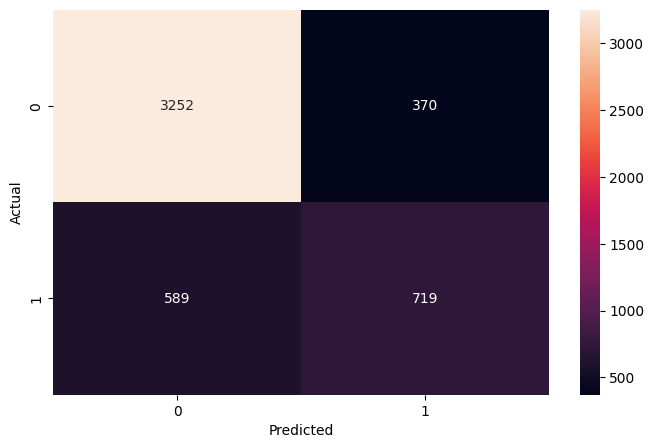

In [207]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, X_train_pred)
data = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_train))
data.index.name = 'Actual'
data.columns.name = 'Predicted'
plt.figure(figsize=(8,5))
sns.heatmap(data, annot=True, fmt='d')
plt.show()

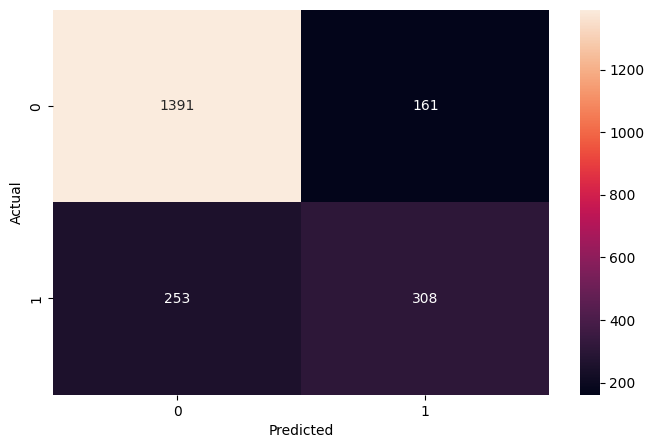

In [206]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, X_test_pred)
data = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
data.index.name = 'Actual'
data.columns.name = 'Predicted'
plt.figure(figsize=(8,5))
sns.heatmap(data, annot=True, fmt='d')
plt.show()